# Lecture : Graph Clustering

## Lab 02 : Kernel k-means -- Exercise

### Xavier Bresson, Jiaming Wang


In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/CS5284_2024_codes/codes/03_Graph_Clustering'
    print(path_to_file)
    # change current path to the folder containing "path_to_file"
    os.chdir(path_to_file)
    !pwd
    

In [2]:
# Load libraries
import numpy as np
import scipy.io
%matplotlib inline 
import matplotlib.pyplot as plt
import time
import sys; sys.path.insert(0, 'lib/')
%load_ext autoreload
%autoreload 2
from lib.utils import construct_kernel
from lib.utils import compute_kernel_kmeans_EM
from lib.utils import compute_kernel_kmeans_spectral
from lib.utils import compute_purity
from lib.utils import construct_knn_graph
from lib.utils import compute_ncut
from lib.utils import compute_pcut
from lib.utils import graph_laplacian
import warnings; warnings.filterwarnings("ignore")


n,d,nc: 2000 2 2


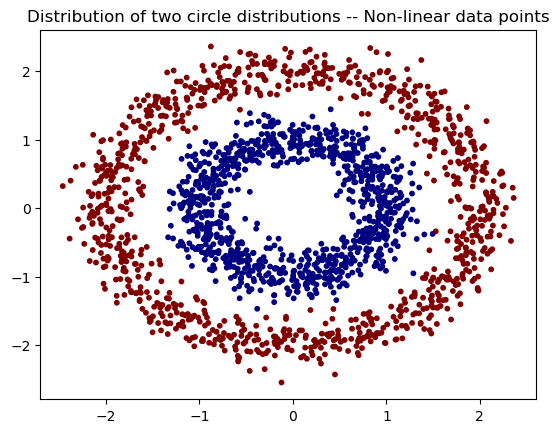

In [3]:
# Load two-circle dataset
mat = scipy.io.loadmat('datasets/two_circles.mat') 
X = mat['X'] # (2000, 2), numpy.ndarray
n = X.shape[0]
d = X.shape[1]
Cgt = mat['Cgt']-1; Cgt = Cgt.squeeze() # (2000,)
nc = len(np.unique(Cgt)) # 2
print('n,d,nc:',n,d,nc)

plt.figure(1)
size_vertex_plot = 10
plt.scatter(X[:,0], X[:,1], s=size_vertex_plot*np.ones(n), c=Cgt, cmap='jet')
plt.title('Distribution of two circle distributions -- Non-linear data points')
plt.show()


### Question 1: Evaluate the performance of *Linear* k-Means using Expectation-Maximization (EM) with multiple random initializations

Use the following code: `compute_kernel_kmeans_EM(nc, Ker, Theta, n_trials)` with the input arguments:

* nc : Number of clusters.
* Ker : Kernel matrix of size n x n, where n is the number of data points.
* Theta : Weight matrix of size n x n, typically a diagonal matrix with the weights of each data point.
* n_trials : Number of runs for kernel k-means. The function returns the solution with the minimum final energy.

How many runs are necessary to obtain the correct solution?


Construct Linear Kernel
(2000, 2000)


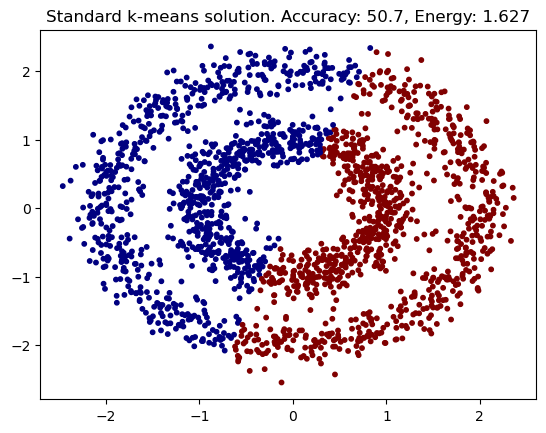

In [4]:
# Run standard/linear k-means
Theta = np.ones(n) # Same weight for all data

# Compute linear kernel for standard k-means
Ker = construct_kernel(X, 'linear') # (2000, 2000)
print(Ker.shape)

# standard k-means
n_trials = 10
C_kmeans, En_kmeans = compute_kernel_kmeans_EM(nc, Ker, Theta, n_trials) # YOUR CODE HERE

# Plot
plt.figure(2)
size_vertex_plot = 10
plt.scatter(X[:,0], X[:,1], s=size_vertex_plot*np.ones(n), c=C_kmeans, cmap='jet')
plt.title('Standard k-means solution. Accuracy: ' + str(compute_purity(C_kmeans,Cgt,nc))[:5] +
         ', Energy: ' + str(En_kmeans)[:5])
plt.show()


### Question 2: Evaluate the performance of *Non-Linear* k-Means using EM with multiple random initializations

How many runs are necessary to achieve the correct solution?


Construct kNN Gaussian Kernel
(2000, 2000)


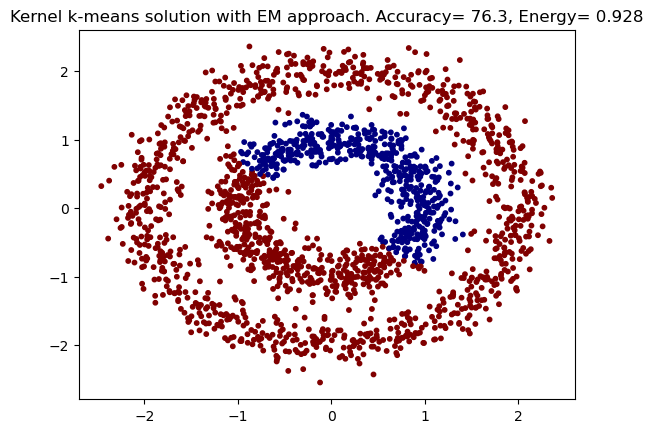

In [5]:
# Run kernel/non-linear k-means with EM approach
 
# Compute linear Kernel for standard k-means
Ker = construct_kernel(X, 'kNN_gaussian', 100)
print(Ker.shape)

# Kernel k-means with EM approach
n_trials = 10
C_kmeans, En_kmeans = compute_kernel_kmeans_EM(nc, Ker, Theta, n_trials)

# Plot
plt.figure(3)
size_vertex_plot = 10
plt.scatter(X[:,0], X[:,1], s=size_vertex_plot*np.ones(n), c=C_kmeans, cmap='jet')
plt.title('Kernel k-means solution with EM approach. Accuracy= ' + str(compute_purity(C_kmeans,Cgt,nc))[:5] +
         ', Energy= ' + str(En_kmeans)[:5])
plt.show()


### Question 3: Evaluate the performance of *Non-Linear* k-Means using the Spectral technique

Use the function `compute_kernel_kmeans_spectral(nc, Ker, Theta)` with the following input arguments:
* nc : Number of clusters.
* Ker : Kernel matrix of size n x n, where n is the number of data points.
* Theta : Weight matrix of size n x n, a diagonal matrix containing the weights of each data point.

Note that this function does not have an `n_trials` input argument. Why do you think that is?


Construct kNN Gaussian Kernel
(2000, 2000)
Construct Linear Kernel


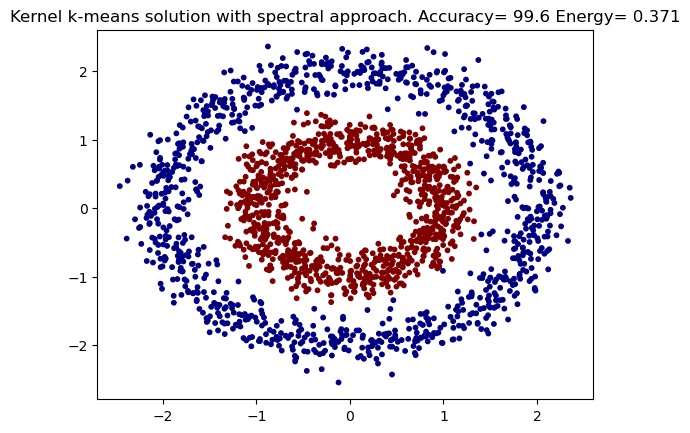

In [6]:
# Run kernel/non-linear k-means with spectral approach
 
# Compute linear kernel for standard k-means
Ker = construct_kernel(X, 'kNN_gaussian', 100)
print(Ker.shape)

# Kernel k-means with spectral approach
C_kmeans, En_kmeans = compute_kernel_kmeans_spectral(nc, Ker, Theta) # YOUR CODE HERE

# Plot
plt.figure(4)
size_vertex_plot = 10
plt.scatter(X[:,0], X[:,1], s=size_vertex_plot*np.ones(n), c=C_kmeans, cmap='jet')
plt.title('Kernel k-means solution with spectral approach. Accuracy= ' + 
          str(compute_purity(C_kmeans,Cgt,nc))[:5] + ' Energy= ' + str(En_kmeans)[:5])
plt.show()
